## Calibration of lab probes ANK1 ANK2 after bending

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. We are recalibrating because we bent the electrodes 1 mm to get a shallower water column measurement.

We used a higher salinity than usual which gave a max density of 1.03762 g/cm^3. 

Channel order: CH1 - ANK1, CH2 - ANK2

We ran this calibration in situ for ANK1, ANK2

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
df = pd.read_csv('../calibration_18apr19/calibration.csv',header=2)
print(df)


    salty  tap  percentage  density  temperature  Unnamed: 5
0     NaN  NaN         100  1.03762       20.017         NaN
1     NaN  NaN          90  1.03363       20.030         NaN
2     NaN  NaN          80  1.02937       20.014         NaN
3     NaN  NaN          75  1.02776       20.016         NaN
4     NaN  NaN          70  1.02676       20.016         NaN
5     NaN  NaN          65  1.02358       20.014         NaN
6     NaN  NaN          60  1.02213       20.012         NaN
7     NaN  NaN          50  1.01804       20.016         NaN
8     NaN  NaN          40  1.01417       20.014         NaN
9     NaN  NaN          30  1.01019       20.015         NaN
10    NaN  NaN          20  1.00595       20.024         NaN
11    NaN  NaN          10  1.00215       20.017         NaN
12    NaN  NaN           5  1.00039       20.017         NaN
13    NaN  NaN           0  0.99775       20.023         NaN


../calibration_18apr19/100pc.mat
../calibration_18apr19/090pc.mat
../calibration_18apr19/080pc.mat
../calibration_18apr19/075pc.mat
../calibration_18apr19/070pc.mat
../calibration_18apr19/065pc.mat
../calibration_18apr19/060pc.mat
../calibration_18apr19/050pc.mat
../calibration_18apr19/040pc.mat
../calibration_18apr19/030pc.mat
../calibration_18apr19/020pc.mat
../calibration_18apr19/010pc.mat
../calibration_18apr19/005pc.mat
../calibration_18apr19/000pc.mat


Text(0.5,1,'CH2 - ANK2 ')

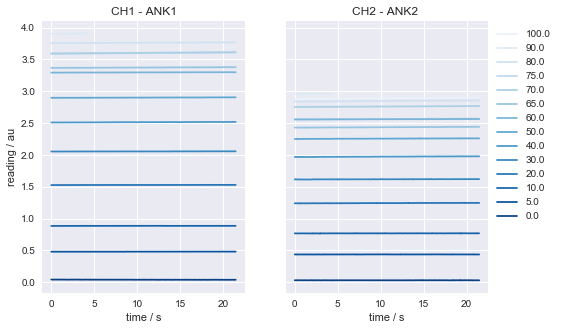

In [10]:
file_num = 14

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

nums = ['100','090','080','075','070','065','060','050','040','030','020','010','005','000']
 
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(8,5), sharey=True)

sns.set_palette('Blues', 14)
for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_18apr19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2, label='%1.1f' %df.percentage[ii])
    
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')


ANK1
rho_1 = 0.997183+0.007756r+-0.002301r^2+0.000710r^3 

ANK2
rho_2 = 0.997496+0.006849r+-0.001366r^2+0.001115r^3 



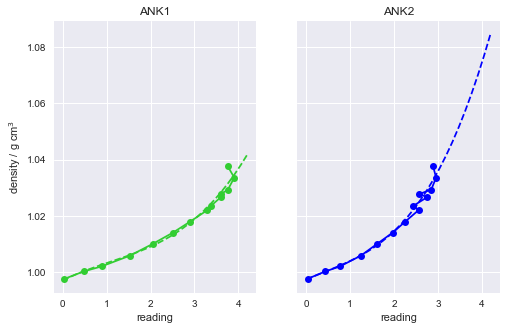

In [12]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,4.2,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(8,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')


ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')


print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))

